In [2]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import  datetime
import plotly.express as px
from config import mt5_credentials 

In [3]:
mt5.initialize(mt5_credentials['exe_path'])
mt5.login(mt5_credentials['login'], mt5_credentials['password'], mt5_credentials['server'])

True

In [4]:
symbol = 'EURUSD'

time_frame = mt5.TIMEFRAME_M5

start_dt  = datetime(2025,  9, 1)
end_dt =  datetime(2025, 9, 26)

rates = mt5.copy_rates_range(symbol,time_frame, start_dt, end_dt)
rates_df = pd.DataFrame(rates)
rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')
print(rates_df.tail()[['open', 'high', 'low', 'close']])
rates_df



         open     high      low    close
5437  1.16549  1.16560  1.16537  1.16546
5438  1.16547  1.16547  1.16525  1.16538
5439  1.16539  1.16563  1.16523  1.16545
5440  1.16544  1.16550  1.16500  1.16523
5441  1.16524  1.16557  1.16520  1.16556


,time,open,high,low,close,tick_volume,spread,real_volume
0,2025-09-01 00:00:00,1.16943,1.16943,1.16940,1.16940,9,43,0
1,2025-09-01 00:05:00,1.16939,1.16939,1.16921,1.16933,19,23,0
2,2025-09-01 00:10:00,1.16946,1.16946,1.16930,1.16930,18,49,0
3,2025-09-01 00:15:00,1.16930,1.16937,1.16929,1.16929,9,52,0
4,2025-09-01 00:20:00,1.16929,1.16937,1.16928,1.16928,9,50,0
...,...,...,...,...,...,...,...,...
5437,2025-09-25 21:40:00,1.16549,1.16560,1.16537,1.16546,117,2,0
5438,2025-09-25 21:45:00,1.16547,1.16547,1.16525,1.16538,120,2,0
5439,2025-09-25 21:50:00,1.16539,1.16563,1.16523,1.16545,134,2,0
5440,2025-09-25 21:55:00,1.16544,1.16550,1.16500,1.16523,132,2,0


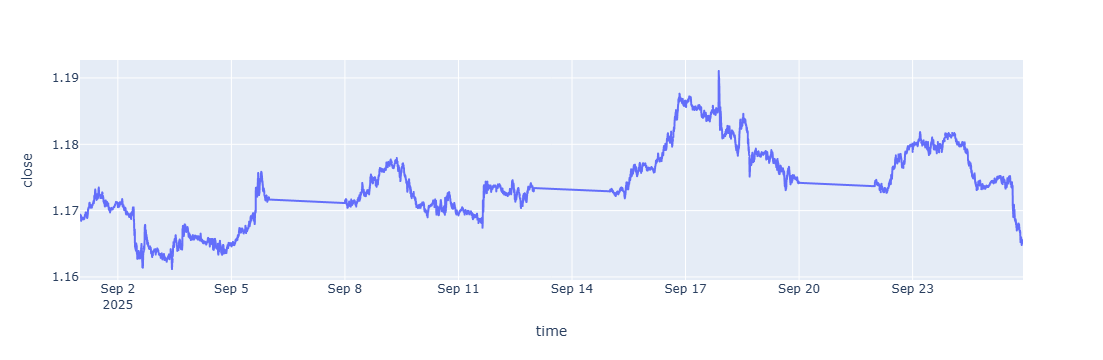

In [5]:
px.line(rates_df, x='time', y='close')

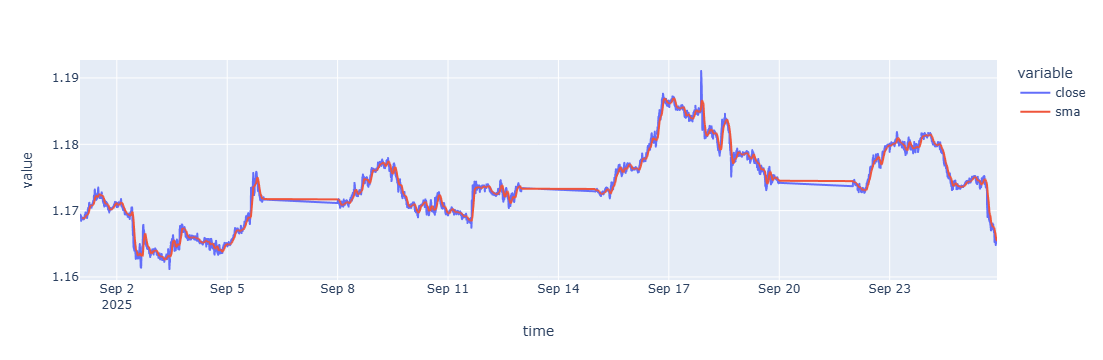

In [6]:
sma_period = 20


rates_df['sma'] = rates_df['close'].rolling(sma_period).mean()

px.line(rates_df, x='time', y=['close','sma'])

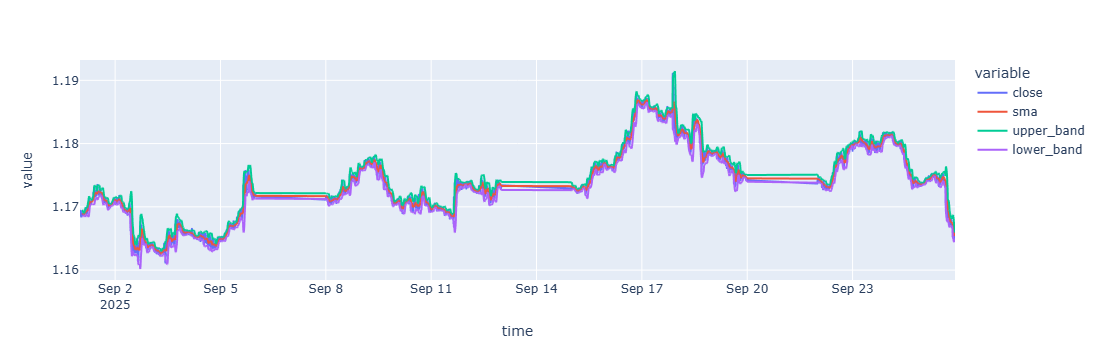

In [7]:
bollinger_period = 20
num_deviations = 2

rates_df['std'] = rates_df['close'].rolling(sma_period).std()
rates_df['upper_band'] = rates_df['sma'] + num_deviations * rates_df['std']
rates_df['lower_band'] = rates_df['sma'] - num_deviations * rates_df['std']

px.line(rates_df, x='time', y=['close', 'sma', 'upper_band', 'lower_band'])

In [1]:

%run smabot.py


time 2025-09-30 11:50:49.694378 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:51.010699 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:52.017481 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:53.024293 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:54.030481 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:55.037806 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:56.044262 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:57.050436 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:58.058586 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:50:59.067233 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:51:00.075283 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:51:01.081781 | sma 1.1748094999999998 | last_close 1.17513
time 2025-09-30 11:51:02.087759 | sma 1.1748094999999998 | last_

NameError: name 'symbol' is not defined

In [1]:
%run magic_seperation.py

AttributeError: 'NoneType' object has no attribute 'ask'